In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()
sb.set_palette(sb.color_palette("Set2"))

# Additional Libraries
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score
import xgboost as xgb # Run "!pip install xgboost"

# Import the Clean Dataset
df = pd.read_csv('datasets/student-dropout-academic-success-clean.csv')
student_df = df.iloc[:,[1, 13, 14, 15, 16, 17, 22, 23, 28, 29, 34]].copy()
student_df["Target"] = student_df["Target"].map({
    "Dropout": 1,
    "Graduate": 0
})

In [2]:
predictors = student_df.iloc[:, 0:10] # Predictors
response = student_df.iloc[:, -1] # Response = Target

# Partition Dataset into 2 random portions - 80% Train, 20% Test
predictors_train, predictors_test, response_train, response_test = train_test_split(predictors, response, test_size = 0.2)

In [3]:
# Check sample sizes
print("Train Set :", predictors_train.shape, response_train.shape)
print("Test Set  :", predictors_test.shape, response_test.shape)

Train Set : (2904, 10) (2904,)
Test Set  : (726, 10) (726,)


#### Machine Learning Model

**Models:**
- Logistic Regression
- Decision Tree Classifier
- Random Forest Classifier
- AdaBoost
- XGBoost

**Metric:**
- Accuracy Score with CV
- Precision Score
- Recall Score
- Explained Variance (R^2)
- Root Mean Squared Error (RMSE)

#### Logistic Regression

In [4]:
# Create Logistic Regression model and fit it to the training data
logreg = LogisticRegression(solver='lbfgs', max_iter=1000)
logreg.fit(predictors_train, response_train)

LogisticRegression(max_iter=1000)

In [5]:
# Coefficients of the Logistic Regression line
print('Coefficients \t: a = ', logreg.coef_)
print('Intercept \t: b = ', logreg.intercept_)

Coefficients 	: a =  [[ 0.07467467  1.17851394 -2.50536436  0.47336914 -1.10963598  0.02206178
   0.14143595  0.02643108 -0.63190324 -0.09474294]]
Intercept 	: b =  [3.49720526]


In [6]:
# Predict on test set
logreg_response_test_pred = logreg.predict(predictors_test)

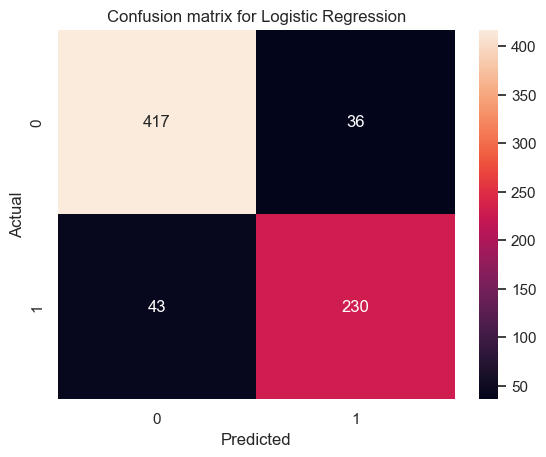

In [7]:
# Plot Confusion Matrix for Logistic Regression Machine Learning Model
sb.heatmap(confusion_matrix(response_test, logreg_response_test_pred), annot = True, fmt = 'g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix for Logistic Regression')
plt.show()

In [8]:
# Evaluate Evaluation Metrics
logreg_scores = cross_val_score(logreg, predictors, response, cv = 10, scoring = "accuracy")
logreg_mse = np.mean(np.square(np.array(response_test) - np.array(logreg_response_test_pred)))

print("Logistic Regression Machine Learning Model\n")
print("Explained Variance (R^2):\t", logreg.score(predictors_test, response_test))
print("Root Mean Squared Error (RMSE):\t", np.sqrt(logreg_mse))
print("Accuracy Score with CV:\t\t", logreg_scores.mean())
print("Precision Score:\t\t", precision_score(response_test, logreg_response_test_pred, average = "macro"))
print("Recall Score:\t\t\t", recall_score(response_test, logreg_response_test_pred, average = "macro"))

Logistic Regression Machine Learning Model

Explained Variance (R^2):	 0.8911845730027548
Root Mean Squared Error (RMSE):	 0.32987183419814003
Accuracy Score with CV:		 0.8851239669421489
Precision Score:		 0.8855916966328865
Recall Score:			 0.881510321907673


#### Decision Tree Classifier

In [9]:
# Create Decision Tree Classifier model and fit it to the training data
dectree = DecisionTreeClassifier()
dectree.fit(predictors_train, response_train)

DecisionTreeClassifier()

In [10]:
# Predict on test set
dectree_response_test_pred = dectree.predict(predictors_test)

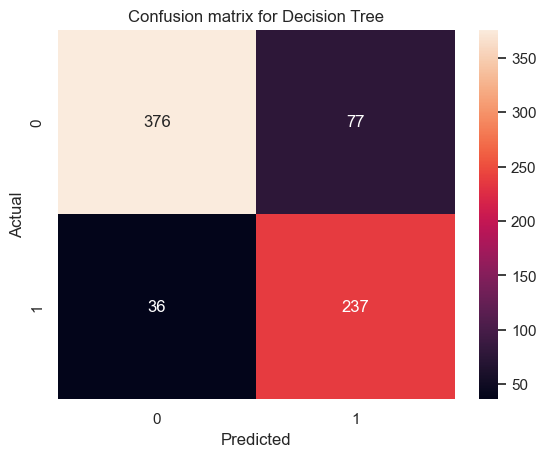

In [11]:
# Plot Confusion Matrix for Decision Tree Classifier Machine Learning Model
sb.heatmap(confusion_matrix(response_test, dectree_response_test_pred), annot = True, fmt = 'g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix for Decision Tree')
plt.show()

In [12]:
# Evaluate Evaluation Metrics
dectree_scores = cross_val_score(dectree, predictors, response, cv = 10, scoring = "accuracy")
dectree_mse = np.mean(np.square(np.array(response_test) - np.array(dectree_response_test_pred)))

print("Decision Tree Classifier Machine Learning Model\n")
print("Explained Variance (R^2):\t", dectree.score(predictors_test, response_test))
print("Root Mean Squared Error (RMSE):\t", np.sqrt(dectree_mse))
print("Accuracy Score with CV:\t\t", dectree_scores.mean())
print("Precision Score:\t\t", precision_score(response_test, dectree_response_test_pred, average = "macro"))
print("Recall Score:\t\t\t", recall_score(response_test, dectree_response_test_pred, average = "macro"))

Decision Tree Classifier Machine Learning Model

Explained Variance (R^2):	 0.8443526170798898
Root Mean Squared Error (RMSE):	 0.39452171413004655
Accuracy Score with CV:		 0.8316804407713498
Precision Score:		 0.8336992146434976
Recall Score:			 0.8490769715935279


#### Random Forest Classifier

In [13]:
# Create Random Forest Classifier model and fit it to the training data
randfclf = RandomForestClassifier(max_depth = 10, random_state = 0)
randfclf.fit(predictors_train, response_train)

RandomForestClassifier(max_depth=10, random_state=0)

In [14]:
# Predict on test set
randfclf_response_test_pred = randfclf.predict(predictors_test)

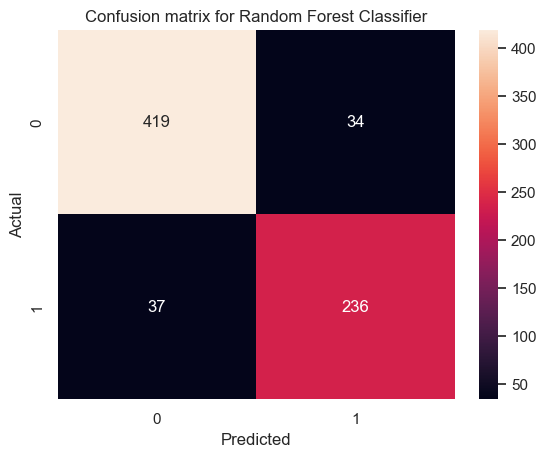

In [15]:
# Plot Confusion Matrix for Random Forest Classifier Machine Learning Model
sb.heatmap(confusion_matrix(response_test, randfclf_response_test_pred), annot = True, fmt = 'g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix for Random Forest Classifier')
plt.show()

In [16]:
# Evaluate Evaluation Metrics
randfclf_scores = cross_val_score(randfclf, predictors, response, cv = 10, scoring = "accuracy")
randfclf_mse = np.mean(np.square(np.array(response_test) - np.array(randfclf_response_test_pred)))

print("Random Forest Classifier Machine Learning Model\n")
print("Explained Variance (R^2):\t", randfclf.score(predictors_test, response_test))
print("Root Mean Squared Error (RMSE):\t", np.sqrt(randfclf_mse))
print("Accuracy Score with CV:\t\t", randfclf_scores.mean())
print("Precision Score:\t\t", precision_score(response_test, randfclf_response_test_pred, average = "macro"))
print("Recall Score:\t\t\t", recall_score(response_test, randfclf_response_test_pred, average = "macro"))

Random Forest Classifier Machine Learning Model

Explained Variance (R^2):	 0.9022038567493113
Root Mean Squared Error (RMSE):	 0.3127237490992469
Accuracy Score with CV:		 0.8931129476584022
Precision Score:		 0.8964668615984406
Recall Score:			 0.8947068384154477


#### AdaBoost

In [17]:
# Create AdaBoost model and fit it to the training data
ada = AdaBoostClassifier(n_estimators = 100, learning_rate = 1)
ada.fit(predictors_train, response_train)

# Predict on test set
ada_response_test_pred = ada.predict(predictors_test)

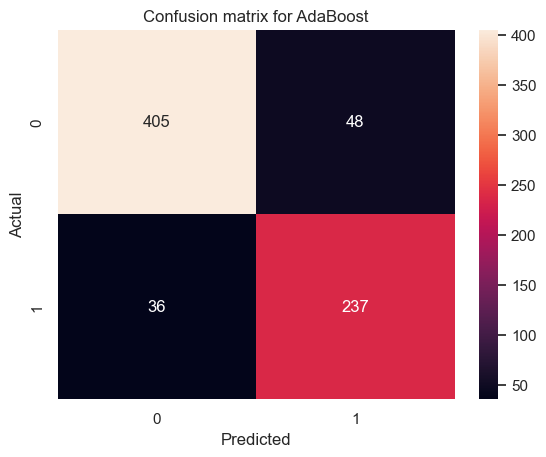

In [18]:
# Plot Confusion Matrix for AdaBoost Machine Learning Model
sb.heatmap(confusion_matrix(response_test, ada_response_test_pred), annot = True, fmt = 'g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix for AdaBoost')
plt.show()

In [19]:
# Evaluate Evaluation Metrics
ada_scores = cross_val_score(ada, predictors, response, cv = 10, scoring = "accuracy")
ada_mse = np.mean(np.square(np.array(response_test) - np.array(ada_response_test_pred)))

print("AdaBoost Machine Learning Model\n")
print("Explained Variance (R^2):\t", ada.score(predictors_test, response_test))
print("Root Mean Squared Error (RMSE):\t", np.sqrt(ada_mse))
print("Accuracy Score with CV:\t\t", ada_scores.mean())
print("Precision Score:\t\t", precision_score(response_test, ada_response_test_pred, average = "macro"))
print("Recall Score:\t\t\t", recall_score(response_test, ada_response_test_pred, average = "macro"))

AdaBoost Machine Learning Model

Explained Variance (R^2):	 0.8842975206611571
Root Mean Squared Error (RMSE):	 0.34015067152490375
Accuracy Score with CV:		 0.8895316804407714
Precision Score:		 0.8749731471535983
Recall Score:			 0.8810858016156029


#### XGBoost

In [20]:
# Create XGBoost model and fit it to the training data
xg = xgb.XGBClassifier(learning_rate = 0.1, n_estimators = 100)
xg.fit(predictors_train, response_train)

# Predict on test set
xg_response_test_pred = xg.predict(predictors_test)

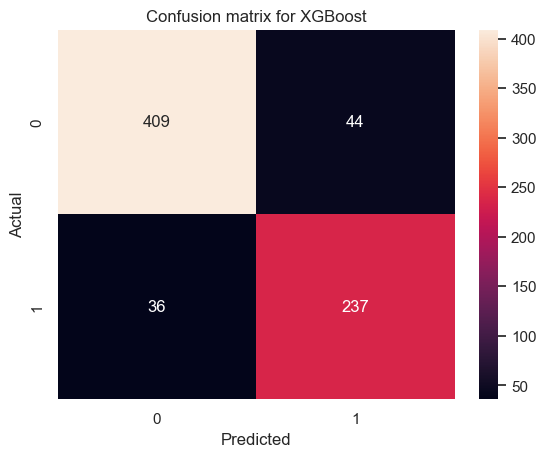

In [21]:
# Plot Confusion Matrix for XGBoost Machine Learning Model
sb.heatmap(confusion_matrix(response_test, xg_response_test_pred), annot = True, fmt = 'g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix for XGBoost')
plt.show()

In [22]:
# Evaluate Evaluation Metrics
xg_scores = cross_val_score(xg, predictors, response, cv = 10, scoring = "accuracy")
xg_mse = np.mean(np.square(np.array(response_test) - np.array(xg_response_test_pred)))

print("XGBoost Machine Learning Model\n")
print("Explained Variance (R^2):\t", xg.score(predictors_test, response_test))
print("Root Mean Squared Error (RMSE):\t", np.sqrt(xg_mse))
print("Accuracy Score with CV:\t\t", xg_scores.mean())
print("Precision Score:\t\t", precision_score(response_test, xg_response_test_pred, average = "macro"))
print("Recall Score:\t\t\t", recall_score(response_test, xg_response_test_pred, average = "macro"))

XGBoost Machine Learning Model

Explained Variance (R^2):	 0.8898071625344353
Root Mean Squared Error (RMSE):	 0.3319530651546461
Accuracy Score with CV:		 0.8955922865013773
Precision Score:		 0.8812587468511336
Recall Score:			 0.8855008126531305


#### Sci-kit Learn Multi-layer Perceptron Classifier

In [23]:
# Scale predictor train and test data (Pre-processing)
# Ensure each feature contributes equally to the model's output -> More accurate and consistent predictions
scaler = StandardScaler()
predictors_train_scaled = scaler.fit_transform(predictors_train) 
predictors_test_scaled = scaler.transform(predictors_test)

In [24]:
# Create Sci-kit Learn MLP Classifier model and fit it to the training data

# hidden_layer_sizes: Number of nodes in each hidden layer
# activation: Activation function ("relu" = Rectified Linear Unit)
# solver: Specifies optimizer used to train the model ("adam" = Adaptive Moment Estimation)
# alpha: Controls trade-off between fitting training data and preventing over-fitting
# learning_rate: Specifies learning rate for weight updates
# max_iter: Maximum number of iterations for solver to converge

mlp = MLPClassifier(hidden_layer_sizes = (64, 32), activation = "relu", solver = "adam", alpha = 0.0001, learning_rate = "constant", max_iter = 1000)
mlp.fit(predictors_train_scaled, response_train)

# Predict on test set
mlp_response_test_pred = mlp.predict(predictors_test_scaled)

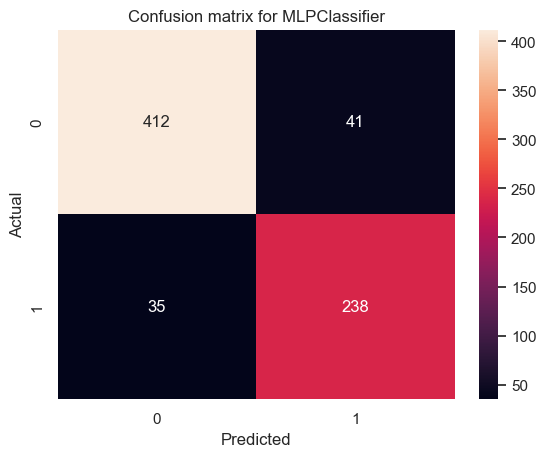

In [25]:
# Plot Confusion Matrix for Sci-kit Learn MLP Classifier Deep Learning Model
sb.heatmap(confusion_matrix(response_test, mlp_response_test_pred), annot = True, fmt = 'g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix for MLPClassifier')
plt.show()

In [26]:
# Evaluate Evaluation Metrics
mlp_scores = cross_val_score(mlp, predictors, response, cv = 10, scoring = "accuracy")
mlp_mse = np.mean(np.square(np.array(response_test) - np.array(mlp_response_test_pred)))

print("Sci-kit Learn MLPClassifier Deep Learning Model\n")
print("Explained Variance (R^2):\t", mlp.score(predictors_test_scaled, response_test))
print("Root Mean Squared Error (RMSE):\t", np.sqrt(mlp_mse))
print("Accuracy Score with CV:\t\t", mlp_scores.mean())
print("Precision Score:\t\t", precision_score(response_test, mlp_response_test_pred, average = "macro"))
print("Recall Score:\t\t\t", recall_score(response_test, mlp_response_test_pred, average = "macro"))

Sci-kit Learn MLPClassifier Deep Learning Model

Explained Variance (R^2):	 0.8953168044077136
Root Mean Squared Error (RMSE):	 0.32354782581913066
Accuracy Score with CV:		 0.8917355371900826
Precision Score:		 0.8873734093478627
Recall Score:			 0.8906435727627781
